# HW1: EPIDEMIC MODELS AND DATA PRE-PROCESSING

This assignment is divided in two parts.


PART 1:


In this part you will build upon the SIR model that we saw in Lab1 and extend it to include the class for the Exposed population. You will define the system of ODEs, plotting functions, and solve the problem given some parameters. You will learn how to use the scipy library to solve differential equations and do some baseline scientific computing! The task here is to see how by using python we can model a disease's spread in a city or population, do data analysis and visualize our results.  The advanced task of this part introduces a lockdown policy in the population.


PART 2:

In this part, given a dataset, you will go through one of the most important steps in the data mining process. Data pre-processing! You will explore the dataset, plot the variables, handle the missing values, standardize the dataset and perform dimensionality reduction. The learning outcome of this part is to know how one can pre-process a real-world dataset and prepare for a supervised or an unsupervised learning task.


##  Grading: 

1. Basic tasks: points  2
2. Advanced tasks: points 2
3. Total points: 4



#### Student information
Please provide your information for automatic grading.

In [1]:
STUD_SUID = 'geha7500'
STUD_NAME = 'Gebrecherkos Abrha Halefom'
STUD_EMAIL = 'geha7500@student.su.se'

## OUTLINE: 

PART 1:

1. Basic Task: SEIR, total points: 1


    a. sytem of ODES, points 0.3 
    b. Parameter definition and problem solving, points 0.4 
    c. plot function, points 0.3
2. Advanced Task: SEIR with lockdown policy, total points: 1

PART 2: Data pre-processing, plotting and dimensionality reduction

(Basic Tasks: 1-5)

(Advanced Task: 6)

1. Reading the file, points: 0.1
2. Missing Values, points: 0.3
3. Plotting, total points: 0.2


    a. plot_a, points: 0.05
    b. plot_b, points: 0.05
    c. plot_c, points: 0.05
    d. plot_d, points: 0.05

4. Standardization, points: 0.2
5. Dimensionality reduction, total points: 0.2


    a. pca plotting, points: 0.15
    b. pca heatmap, points: 0.05

6. Advanced task: Multi-Dimensional Scaling(MDS) , total points: 1

### NOTE: Each function you make will be graded, so it is important to strictly follow input and output instructions stated in the skeleton code.


In [2]:
#these are the libraries that you will need throughout the assignment
from scipy.integrate import odeint
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from HW1_helper import *

In [3]:
import sklearn
sklearn.__version__

'0.22.1'

## PART 1: EPIDEMIC MODELS

## 1. Basic task: SEIR 


Note: This is a similart version to the SEIR model found in wiki, without the vital dynamics: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model. For this homework we removed the vital dynamics from the model (reference: https://www.idmod.org/docs/emod/hiv/model-seir.html#seir-without-vital-dynamics ) to make it simpler (no births, no deaths in the population) 


Many infectious diseases have an incubation period before being infectious during which the host cannot yet spread the disease.
This delay between the acquisition of infection and the infectious state can be incorporated within the SIR model by adding a latent/exposed population, E, and letting infected (but not yet infectious) individuals move from S to E and from E to I.


$\frac{dS}{dt} = -\beta*I*\frac{S}{N}$

$\frac{dE}{dt} = \beta*I*\frac{S}{N} - \delta*E$

$\frac{dI}{dt} = \delta*E - \gamma*I$

$\frac{dR}{dt} = \gamma*I$


The infectious rate, $\beta$, controls the rate of spread which represents the probability of transmitting a disease between a susceptible and an infectious individual. The incubation rate, $\delta$, is the rate of latent individuals becoming infectious (average duration of incubation is $\frac{1}{\delta}$). Recovery rate, $\gamma$ = 1/D, is determined by the average duration, D, of infection. 

### a. System of ODEs


In the function named deriv_seir:
- implement the above system of ODEs for SEIR, in python

In [4]:
def deriv_seir(y, t, N, beta, gamma, delta):
    """
    Input: y, time grid, N: total population, beta: infectious rate, gamma: recovery rate, delta: incubation period 
    Output: dSdt, dEdt, dIdt, dRdt
    Transform the above system of ODEs in python
    """
    S, E, I, R = y
    
    #Write your code here
    
    dSdt = -beta*I*S/N
    dEdt = beta*I*S/N - delta*E
    dIdt = delta*E - gamma*I
    dRdt = gamma*I
    
    return dSdt, dEdt, dIdt, dRdt

### b. Parameter definition and solving the model

In the function named model_seir, given the model parameters, define:
- the initial conditions (one exposed, rest susceptible), 
- the grid of time-points in days (150 days), 
- the initial conditions vector and 
- finally solve the system of ODEs. 

In [5]:
def model_seir(N, beta, gamma, delta):
    """
    Input: N:total population, beta: infectious rate, gamma: recovery rate, delta: incubation period 
    Output: time, S, E, I, R

    step1: define the initial conditions: one exposed, rest susceptible
    step2: define the grid of time points in days (use 150 days)
    step3: define the initital conditions vector y0
    step3: solve the system of ODEs using odeint from scipy
    """
    #Write your code here

    E = 1
    I = 0
    R = 0
    S = N-E-I-R
    y0 = [S,E,I,R]
    t = np.arange(0, 150, 1)
    odeint_result = odeint(deriv_seir, y0, t,args=(N,beta, gamma, delta))
    S, E, I, R = odeint_result.T

    return t, S, E, I, R

In [6]:
#These are the model parameters, do not change them.
N = 1000
beta = 1.0
D = 10
gamma = 1.0/D
delta = 1.0/5.0

In [7]:
#calling the model_seir function that you defined above and storing the results in t, S, E, I, R
t, S, E, I, R = model_seir(N, beta, gamma, delta)

In [8]:
#If you complete the method, you can run the following line to check whether your functions are correct or not. 
check_model_seir(t,S,E,I,R)

SEIR model test
The time grid is correct
The susceptible population array is correct
The exposed population array is correct
The infected population array is correct
The recovered population array is correct


### c. Plot function


In the function called plot_seir(): 
- plot the S, E, I, R compartments. 
- include a dashed line for the total number of the population (S+E+I+R).
- include labels that depict which line is for which population (using legend)


Specifically the plot should contain: 

- On the x-axis: the population

- On the y-axis: Time in days
 

In the function below you will notice that in the list of parameters is included (...., L=None). The purpose of this parameter is to add a title regarding the lockdown day that you will see in the advanced task. For this part it will not print anything. Do not remove it or change it, even if it does not do anything, as you will need it for the next part.

In [9]:
def plot_seir(t,S,E,I,R,L=None):
    """
    Input: t, S, E, I, R, L (the L parameter is for the next question that introduces a lockdown, for this part it will not do anything so do not change L=None)
     

    step1: create the figure and subplots with nrows=1 and and ncols=1.
    step2: plot the susceptible, exposed, infected, recovered, and total population
    step3: set x and y label and tick parameters
    step4: add the corresponding names of each line using legend
     
    """
    #Write your code here
    
    fig,a =  plt.subplots(1,1)
    a.plot(t,S)
    a.plot(t,E)
    a.plot(t,I)
    a.plot(t,R)
    plt.axhline(y=N, color='violet', linestyle='--')
    plt.xticks(ticks=[0,20,40,60,80,100,120,140])
    plt.yticks(ticks=[0,200,400,600,800,1000])
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    if L is None:
        a.legend(['Susceptible', 'Exposed', 'Infectious','Recovered', 'Total'],loc='center right')
    if L is not None:
        a.legend(['Susceptible', 'Exposed', 'Infectious','Recovered', 'Total'],loc='center left')
        plt.title("Lockdown after {} days".format(L))
    plt.show()

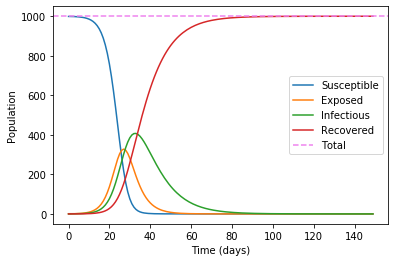

In [10]:
#calling plot_seir here
plot_seir(t,S,E,I,R)

## 2. Advanced Task: Lockdown


In this task you will build upon the previous model and you will introduce a Lockdown policy.
Until now, the model you defined was highly unrealistic as the R0-value was constant. If a government introduces a lockdown in the country then the basic reproductive number(R0) drops! Meaning that you have to adapt the parameters to change over time.  

Your task is as follows:

- Re-write the system of ODEs for SEIR in the function called deriv_seir_lockdown. The reason why you should define the function again, is that, this time, the $\beta$ is time dependent. Other than that, the system of ODEs remains the same. 

- Next, in the function, named model_seir_lockdown(), define:

    -the time dependent $R_0$ and $\beta$ as mentioned in 1, 2 just below the bullet points.

    -the initial conditions (one exposed, rest susceptible), 

    -the grid of time-points in days (150 days), 

    -the initial conditions vector and 
    
    -finally solve the system of ODEs. 




1. Time dependent $R_0$:


Say that the lockdown is introduced on day 30 after the first case of the disease in the country. In that case the $R_0$ drops to 0.9 the day of the lockdown. The value of $R_0$ before that day was 5.7

2. Time dependent $\beta$:

Remember that the definition of beta is $\beta$ = $R_0$* $\gamma$. If $R_0$ is time dependent then $\beta$ is also time dependent.     


To plot your model, the plot_seir() function that was defined in question .c is used again, but now in the list of parameters is also the lockdown.


In [11]:
def deriv_seir_lockdown(y, t, N, beta, gamma, delta):
    """
    Input: y, time grid, N: total population, beta: infectious rate, gamma: recovery rate, delta: incubation period 
    Output: dSdt, dEdt,  dIdt, dRdt
  
    Transform the above system of ODEs in python considering this time: time dependent beta

    """

    S, E, I, R = y
    #implement the new SEIR equations here. The SEIR equations are the same as defined above 
    
    ##but now beta is time dependent!: beta(t)

    dSdt = -beta(t)*I*S/N
    dEdt = beta(t)*I*S/N - delta*E
    dIdt = delta*E - gamma*I
    dRdt = gamma*I
    
    return dSdt, dEdt, dIdt, dRdt

In [12]:
def model_seir_lockdown(gamma, delta):
    """
    Input: gamma, delta
    Output: t,S,E,I,R,L


    step1: define, in R_0(t), the time dependent R0
    step2: define, in beta(t), the time dependent beta
    step3: set initial conditions, one exposed, rest susceptible
    step4: fill in the grid of time points (in days) (you should consider 150 days)
    step5: fill in the initial conditions vector
    step5: use odeint from scipy to solve the system ODEs

    """
    L = 30 #day of lockdown


    def R_0(t):
        #R0 equals to 5.7 if the current day is before the lockdown day (L) and R0 equals to 0.9 if the current day is equal or after the lockdown day (L)

        #write your code here for R_0(t)
        return 5.7 if t < L else 0.9
    
    def beta(t):
        #remember beta = R0*gamma

        #write your code here for beta(t)
        return R_0(t) * gamma





    #write your code here (after step3)

    E = 1
    I = 0
    R = 0
    S = N-E-I-R
    t = np.arange(0, 150, 1)
    y0 = [S, E, I, R]
    odeint_result = odeint(deriv_seir_lockdown, y0, t,args=(N,beta, gamma, delta))
    S, E, I, R = odeint_result.T
    
    return t, S, E, I, R, L

In [13]:
N=1000
D = 10
gamma = 1.0/D
delta = 1.0/5.0

In [14]:
#calling the model_seir_lockdown function that you defined above and storing the results in t, S, E, I, R, L
t, S, E, I, R, L = model_seir_lockdown(gamma,delta)

In [15]:
#If you complete the method, you can run the following line to check whether your functions are correct or not. 
check_model_seir_lockdown(t,S,E,I,R,L)

SEIR model with lockdown test
The time grid is correct
The susceptible population array is correct
The exposed population array is correct
The infected population array is correct
The recovered population array is correct
Correct day of lockdown


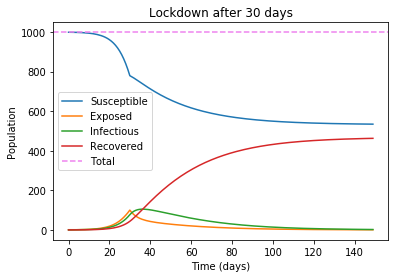

In [16]:
#calling plot_seir() here
plot_seir(t, S, E, I, R, L)

## PART 2: DATA PRE-PROCESSING, PLOTTING AND DIMENSIONALITY REDUCTION

## (Basic Tasks: 1-5)

## *1.* Reading the file


Read the "adult.data" dataset which is under the folder  named "datasets". 
You can read information about the dataset here: http://archive.ics.uci.edu/ml/datasets/Adult


Attribute Information:

- income: >50K, <=50K

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- fnlwgt: continuous.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, 
Doctorate, 5th-6th, Preschool.
education-num: continuous.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.

- capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [17]:
data = pd.read_csv("datasets/adult.data", header=None) 

In [18]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K




In the function named basic_preprocessing, that takes as input the dataframe called data, do the following: 

- Change the column names to their corresponding ones, as seen above in attribute information

- Rename the class label (income) to ' <=50K': 0, ' >50K': 1



In [19]:
def basic_preprocessing(data):
    """
    Input: the dataset
    Output: the dataset with the below changes, named data_renamed

    step1: change the column names 
    step2: rename the class label
    """
    #Write your code here
    
    data_renamed = data
    New_Labels=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
    data_renamed.columns = New_Labels
    data_renamed['income'] = data_renamed['income'].replace({' <=50K': 0, ' >50K': 1})   

    return data_renamed

In [20]:
#calling the function here:
data = basic_preprocessing(data)

In [21]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [22]:
#if you want to see information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [23]:
#if you want to see information about the dataset:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## *2.* Missing values

 
Note: Missing values in the file are represented as “ ?”. Note that there is a space before the ?.

a. In the function named missing_values_and_plotting do the following:
- Check how many missing values exist per attribute in the dataframe. Store the result in a pd.Series called missing_values_count. 
- Plot the missing_values_count as a barplot (you can use kind=”barh”). The names of the features should appear in the plot.


In [24]:
def missing_values_and_plotting(data):
    """
    input: the adult dataset that you preprocessed in question 1
    output: the series that has the counts of missing values per attribute, named missing_values_count

    step1: store the number of missing values per attribure, in the series called missing_values_count
    step2: plot the missing values series as a barplot. You can use pandas to plot the series. 

    """
    #Write your code here

    missing_value = data 
    missing_values_count = missing_value.replace({ " ?": np.nan})
    missing_values_count = missing_values_count.isnull()
    missing_values_count = missing_values_count.sum()
    ax = missing_values_count.plot.barh()
    plt.title('Barplot of missing values')
    
    return missing_values_count

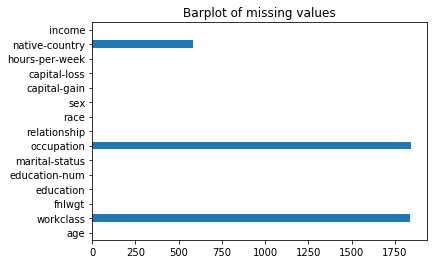

In [25]:
#calling the function
missing_values_count = missing_values_and_plotting(data)

In [26]:
missing_values_count

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [27]:
#If you complete the method, you can run the following line to check whether the output of the missing_values_count is correct or not. 
#check_2a(missing_values_count)

b. In the function named drop_missing_values, do the following:
- Replace the missing values(" ?") with np.nan. 
- Drop the np.nan values.  


In [28]:
def drop_missing_values(data):
    """
    Input: the dataset
    Outplut: the dataframe with the dropped values

    step1: replace the ' ?' with np.nan
    step2: drop the nan values and store the result in data_dropped
    
    """
    #Write your code here

    data = data.replace({' ?': np.nan})
    data_dropped = data[data.notna()]
    data_dropped = data_dropped.dropna()
    
    return data_dropped

In [29]:
#calling the drop_missing_values() here
data_dropped = drop_missing_values(data)

In [30]:
#Make sure that the rows that have missing values are deleted.
data_dropped

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [31]:
#If you complete the method, you can run the following line to check whether the number of the rows of data_dropped is correct or not.
#in the number of rows pass the number of rows the data_dropped has. 
number_of_rows = len(data_dropped.index) #change None to the number of rows data_dropped has. 
#check_2b(number_of_rows)

## *3.* Plotting


a.	In the function named plot_a do the following:
- Store in a pd.Series(), called unique_values_of_class, the count of unique values of the class label(how many people have income >50K and <=50K?).
- Then plot a barplot of the class label. You can use pandas to plot. 


In [32]:
def plot_a(data):
    """
    Input: the dataframe with the dropped values from question 2c.
    Output: a pd.Series(), called unique_values_of_class, with the count of unique values for the class label (income).


    step1: find the count of unique values for the class label. You can use value_counts().
    step2: plot a barplot of the unique_values_of_class using pandas.
    """

    #Write your code here

    unique_values_of_class = data['income'].value_counts()
    ax = unique_values_of_class.plot.barh()
    plt.title('Barplot of missing values')

    return unique_values_of_class

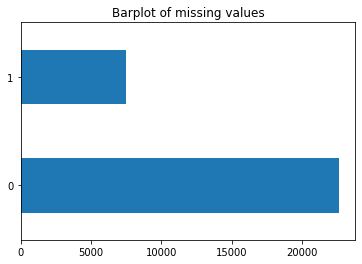

In [33]:
#calling plot_a()
unique_values_of_class = plot_a(data_dropped)

In [34]:
unique_values_of_class 

0    22654
1     7508
Name: income, dtype: int64

In [35]:
#If you complete the method, you can run the following line to check whether the output of the unique_values_of_class is correct or not. 
#check_3a(unique_values_of_class)

b.	In the function named plot_b do the following:
- Store in a dataframe named sex_by_class, the respective counts of class labels by sex. (How many women/men have a class label of 0? How many women/men have a class label of 1?)
- Examine the attribute sex by plotting a barplot in relation to the income. You can use pandas again. 


In [36]:
def plot_b(data):
    """
    Input: the dataset with the dropped missing values.
    Output: the dataframe that groups the input data by sex and counts the number of the two class labels per sex. 


    step1: store in a dataframe named sex_by_class, a dataframe with the respective counts of class labels by sex. 
    step2: Plot a barplot for the sex_by_class. You can use pandas to plot it.

    """
    #Write your code here

    sex_by_class = data.groupby(["income", "sex"]).size()
    ax = sex_by_class.plot.barh()
    
    return sex_by_class

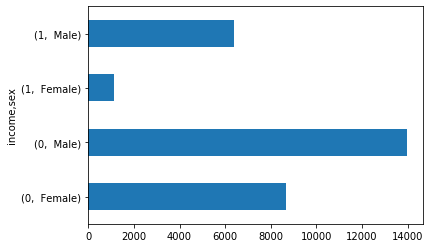

In [37]:
#calling the function:
sex_by_class = plot_b(data_dropped)

In [38]:
sex_by_class

income  sex    
0        Female     8670
         Male      13984
1        Female     1112
         Male       6396
dtype: int64

In [39]:
#If you complete the method, you can run the following lines to check whether the output values of the sex_by_class dataframe is correct or not. 
female_0 = 8670 #change None to write here how many females have a class label of 0 (income<=50K).
female_1 = 1112 #change None to write here how many females have a class label of 1 (income>50K).
male_0 = 13984 #change None to write here how many males have a class label of 0 (income<=50K).
male_1 = 6396 #change None to write here how many males have a class label of 1 (income>50K).
#check_3b(female_0, female_1, male_0, male_1)

c.	In the function named plot_c do the following:
- Divide the age column into the following age groups: 0-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-100 using the cut function from pandas. The new column should be called age_bins.
- Plot a bar chart for the attribute age_bins, in relation to the class label (income).
- Return the dataframe that has all the original features plus the new one that you created called "age_bins".


In [40]:
def plot_c(data):
    """
    input: the dataset with the dropped missing values
    output: the new dataframe the has all the of data_dropped plus the "age_bins" column

    step1: Create a new column in the input dataframe called "age_bins" and use pd.cut() to divide the age column into the above mentioned age groups. 
    step2: Store in a dataframe named age_by_class, a dataframe with the count of class labels by age_bins. 
    step3: Create a barplot for age_by_class

    """
    #Write your code here

    bins = [0, 20, 30, 40, 50, 60, 70, 80, 101]
    data['age_bins'] = pd.cut(data['age'], bins, right=False)
    age_by_class = data.groupby(["income", "age_bins"]).size()
    ax = age_by_class.plot.barh()

    return data

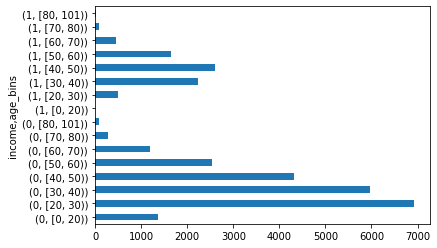

In [41]:
#calling the function here:
age_bins_df = plot_c(data_dropped)

In [42]:
age_bins_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,"[30, 40)"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,"[50, 60)"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,"[30, 40)"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,"[50, 60)"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,"[20, 30)"
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,"[40, 50)"
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,"[50, 60)"
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,"[20, 30)"


d.	In the function named plot_c do the following:
- Create a sample of the dataset with only 1500 rows, using random_state=8 with *no replacement* and store it into a new dataframe called *data_sampled*.
- Make a pairplot of all the numerical values of the sampled dataset and pass the following attributes into the pairplot function: diag_kind='hist' and hue='income'. Use seaborn!


In [43]:
def plot_d(data):
    """
    input: the dataset with the dropped missing values
    output: the sampled dataset called data_sampled


    step1: create a sample of the dataset with only 1500 rows, using random_state=8 with no replacement and store it into a new dataframe called data_sampled
    step2: make a pairplot, using seaborn, of all the numerical values of the sampled dataset and pass the following attributes into the pairplot function: diag_kind='hist' and hue='income'

    """
    #Write your code here

    data_sampled = data.sample(n=1500, replace=False, random_state=8)
    sns.pairplot(data_sampled, diag_kind='hist', hue='income')  

    return data_sampled

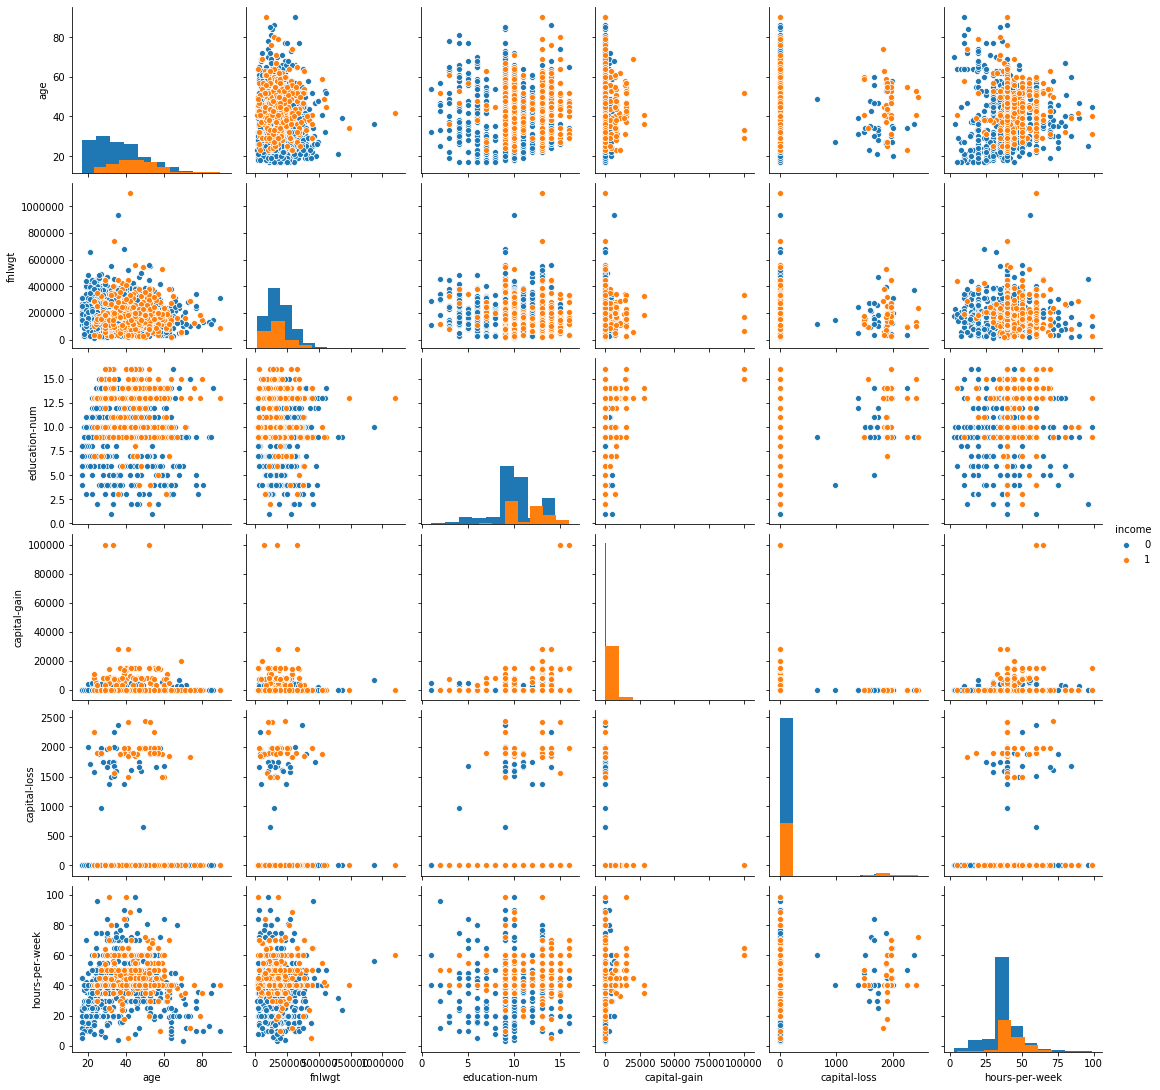

In [44]:
#calling the function here:
data_sampled = plot_d(data_dropped)

In [45]:
data_sampled

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
3229,45,Private,204205,7th-8th,4,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,48,United-States,0,"[40, 50)"
6680,51,Private,136913,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0,"[50, 60)"
30040,22,Private,197583,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,20,United-States,0,"[20, 30)"
5840,22,Private,203894,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Female,0,0,24,United-States,0,"[20, 30)"
5328,27,Private,175262,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,0,"[20, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859,20,Private,206215,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0,"[20, 30)"
21366,28,Private,190391,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,0,"[20, 30)"
24962,22,Private,229456,Some-college,10,Never-married,Adm-clerical,Own-child,Black,Female,0,0,35,United-States,0,"[20, 30)"
4727,29,Private,114224,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1,"[20, 30)"


## *4.* Standardization


In the function named standardize_it:

- Standardize only the numerical features of the sampled dataframe. You can use the StandardScaler from sklearn.
- Store in a variable called y the column of the class label of the sampled dataframe.
- Transform the standardized numpy matrix returned by StandardScaler into a dataframe, with column names their corresponding names.

In [46]:
def standardize_it(data):
    """
    Input: the sampled_dataframe.
    Output: the standardized dataframe called data_standardized and the class label of the sampled dataframe called y. 

    step1: extract only the numerical features from the sampled dataframe as well as the class label.
    step2: use StandardScaler to fit_transform the dataframe with the numerical features.
    step3: transform the standardized numpy matrix returned by StandardScaler into a dataframe.
    step4: rename the columns of the dataframe with their corresponding names.

    """
    #Write your code here

    y = data.select_dtypes(include=np.number)
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(y)
    data_standardized = pd.DataFrame(data_standardized)
    data_standardized.columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
    
    return data_standardized, y

In [47]:
#calling standardize_it() here
data_standardized, y = standardize_it(data_sampled)

In [48]:
data_standardized

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,0.502487,0.136346,-2.407598,-0.154589,-0.21838,0.592999,-0.596857
1,0.965277,-0.506501,-0.445309,-0.154589,-0.21838,-0.091823,-0.596857
2,-1.271541,0.073085,1.124522,-0.154589,-0.21838,-1.803878,-0.596857
3,-1.271541,0.133375,-0.052851,-0.154589,-0.21838,-1.461467,-0.596857
4,-0.885883,-0.140149,1.124522,-0.154589,-0.21838,-0.091823,-0.596857
...,...,...,...,...,...,...,...
1495,-1.425805,0.155548,-0.445309,-0.154589,-0.21838,-0.091823,-0.596857
1496,-0.808751,0.004380,1.124522,-0.154589,-0.21838,-0.091823,-0.596857
1497,-1.271541,0.377571,-0.052851,-0.154589,-0.21838,-0.519837,-0.596857
1498,-0.731620,-0.723251,1.124522,-0.154589,-0.21838,-0.091823,1.675442


In [49]:
y

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
3229,45,204205,4,0,0,48,0
6680,51,136913,9,0,0,40,0
30040,22,197583,13,0,0,20,0
5840,22,203894,10,0,0,24,0
5328,27,175262,13,0,0,40,0
...,...,...,...,...,...,...,...
5859,20,206215,9,0,0,40,0
21366,28,190391,13,0,0,40,0
24962,22,229456,10,0,0,35,0
4727,29,114224,13,0,0,40,1


## *5.* Dimensionality Reduction


a.	In the function named pca_plotting do the following:
- Perform PCA(with random_state=8) using 2 principal components on the standardized dataset. Use the sklearn library.
- Store the explained variance ratio in an attribute called explained_variance_ratio.
- Store in a dataframe called df_principal_components, a dataframe that has as rows the pca components and as columns the sampled dataframe's columns.
- Plot the two principal components with colors respective to the class label.


In [50]:
def pca_plotting(data):
    """
    Input: the standardized dataframe
    Output: the principal components dataframe, the explained_variance_ratio

    step1: perform pca with 2 principal components and random_state=8
    step2: store the explained variance ratio in an attribute called explained_variance_ratio
    step3: store in a dataframe called df_principal_components, a dataframe that has as rows the pca components and as columns names the sampled dataframe's columns
    step4: plot the principal components using a scatterplot and colors respective to the class label

    """
    #Write your code here

    pca_ = PCA(n_components=2, random_state=8)
    principalComponents_ = pca_.fit_transform(data)
    explained_variance_ratio = pca_.explained_variance_ratio_
    df_principal_components = pd.DataFrame(pca_.components_, columns=y.columns)
    
    fig, a = plt.subplots(figsize=(10, 10))
    scatter = a.scatter(principalComponents_[:,0], principalComponents_[:,1], c=data_sampled['income'])
    legend = a.legend(*scatter.legend_elements(), loc="upper left", title="labels")
    a.add_artist(legend)
    plt.xlabel('First Principal Component',fontsize=20)
    plt.ylabel('Second Principal Component',fontsize=20)
    
    return df_principal_components, explained_variance_ratio

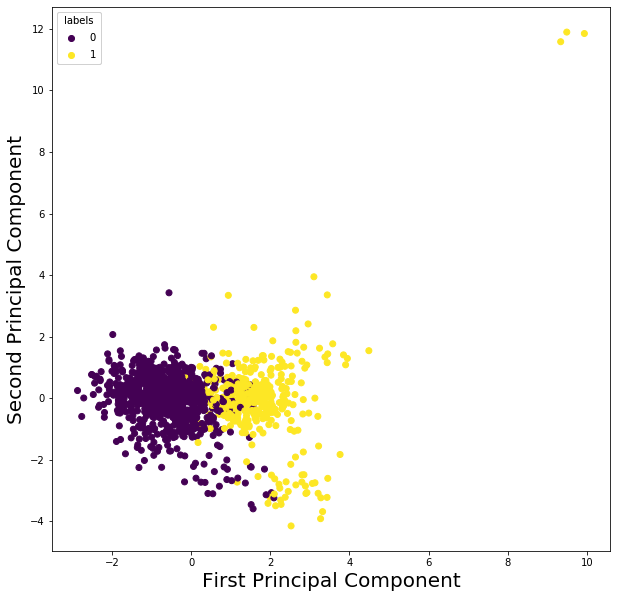

In [51]:
#calling the function here:
df_principal_components, explained_variance_ratio = pca_plotting(data_standardized)

In [52]:
df_principal_components

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,0.337677,-0.130548,0.449292,0.359121,0.229728,0.358555,0.597297
1,-0.425253,0.358253,0.247619,0.564171,-0.556226,0.039406,-0.016474


In [53]:
explained_variance_ratio

array([0.24181696, 0.1515359 ])

In [54]:
#If you complete the method, you can run the following line to check whether the output of df_principal_components and explained_variance_ratio are correct or not. 
#check_5a(df_principal_components, explained_variance_ratio)

b. In the function called heatmap:
- Use seaborn to plot the heatmap using the dataframe you returned in the previous question.

In the attribure_contributing_the_most store the name of the attribure that contribures the most to the variance for the 2nd principal component.


In [55]:
def heatmap(data):
    """
    Input: df_principal_components

    Use seaborn to plot the heatmap

    """
    #Write your code here
    
    heat_map = sns.heatmap(data, cmap="plasma")
    plt.show()  



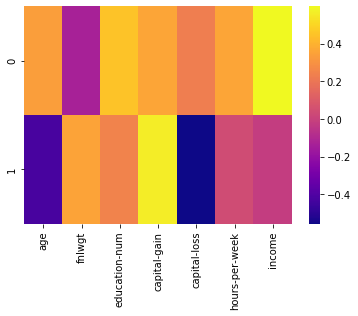

In [56]:
#calling the function here:
heatmap(df_principal_components)

In [57]:
attribure_contributing_the_most = 'capital-loss' #change None with the name of the attribute that contributes the most to the variance, use ""

In [58]:
#If you complete the method, you can run the following line to check whether the attribure that you stored in attribure_contributing_the_most is the correct one. 
#check_5b(attribure_contributing_the_most)

## 6. Advanced task: Multi-Dimensional Scaling

In this task:
- perform  MDS on the data sampled with random state=8. Use sklearn.
- Plot the results with colors respective to the class label.

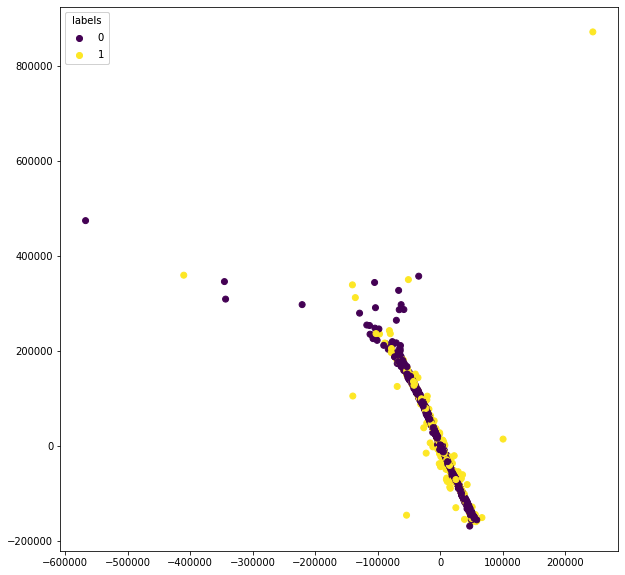

In [59]:
"""
step1: fit the MDS with n_components=2, max_iter=100, random_State=8 and save it into the variable called X_2d
step2: plot the results with colors respective to the class labels
"""

mds_ = MDS(n_components=2, max_iter=100, random_state=8)
X_2d = mds_.fit_transform(y)

fig, a = plt.subplots(figsize=(10, 10))
scatter = a.scatter(X_2d[:,0], X_2d[:,1], c=y['income'])
legend = a.legend(*scatter.legend_elements(), loc="upper left", title="labels")
a.add_artist(legend)

# End of HW 1